In [53]:
# Import Library
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
from scipy.optimize import minimize

### Data Extraction

In [54]:
# Assets under consideration
tickers = ["CAT", "KMTUY", "HTHIY", "DE"]

# Download data
data = yf.download(
    tickers=tickers,
    start="2018-01-01",
    end="2025-12-31",
    interval="1d",
    group_by="ticker",
    auto_adjust=False
)

# Build closing price DataFrame
ICP = pd.DataFrame({
    ticker: data[ticker]["Close"]
    for ticker in tickers
}).ffill().dropna()

ICP.head()

[*********************100%***********************]  4 of 4 completed


,CAT,KMTUY,HTHIY,DE
Date,,,,
2018-01-02,157.039993,36.360001,15.700000,158.009995
2018-01-03,157.279999,36.889999,15.970000,158.729996
2018-01-04,159.440002,37.919998,15.948000,159.639999
2018-01-05,161.960007,37.980000,15.988000,160.320007
2018-01-08,166.029999,38.490002,16.072001,161.110001


In [55]:
#check type of dataset
ICP.dtypes

,0
CAT,float64
KMTUY,float64
HTHIY,float64
DE,float64


### Asset Allocation

/tmp/ipython-input-1303223526.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  BuyHold_CAT     = ICP['CAT']    /float(ICP['CAT'][:1])   -1
/tmp/ipython-input-1303223526.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  BuyHold_KMTUY    = ICP['KMTUY']      /float(ICP['KMTUY'][:1])     -1
/tmp/ipython-input-1303223526.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  BuyHold_HTHIY  = ICP['HTHIY'] /float(ICP['HTHIY'][:1])-1
/tmp/ipython-input-1303223526.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  BuyHold_DE    = ICP['DE']      /float(ICP['DE'][:1])     -1


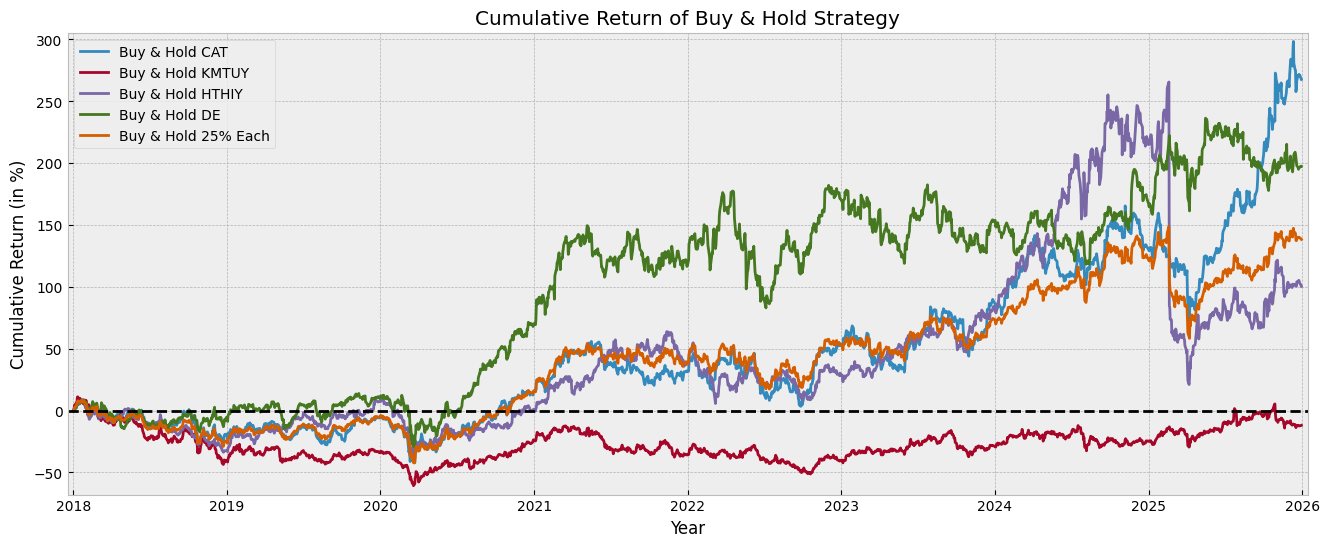

In [56]:
BuyHold_CAT     = ICP['CAT']    /float(ICP['CAT'][:1])   -1
BuyHold_KMTUY    = ICP['KMTUY']      /float(ICP['KMTUY'][:1])     -1
BuyHold_HTHIY  = ICP['HTHIY'] /float(ICP['HTHIY'][:1])-1
BuyHold_DE    = ICP['DE']      /float(ICP['DE'][:1])     -1

BuyHold_25Each = BuyHold_CAT*(1/4) + BuyHold_KMTUY*(1/4) + BuyHold_HTHIY*(1/4) + BuyHold_DE*(1/4)

plt.figure(figsize=(16,6))
plt.plot(BuyHold_CAT*100,     label='Buy & Hold CAT')
plt.plot(BuyHold_KMTUY*100,    label='Buy & Hold KMTUY')
plt.plot(BuyHold_HTHIY*100,  label='Buy & Hold HTHIY')
plt.plot(BuyHold_DE*100,    label='Buy & Hold DE')
plt.plot(BuyHold_25Each*100, label='Buy & Hold 25% Each')
plt.xlabel('Year')
plt.ylabel('Cumulative Return (in %)')
plt.title('Cumulative Return of Buy & Hold Strategy')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

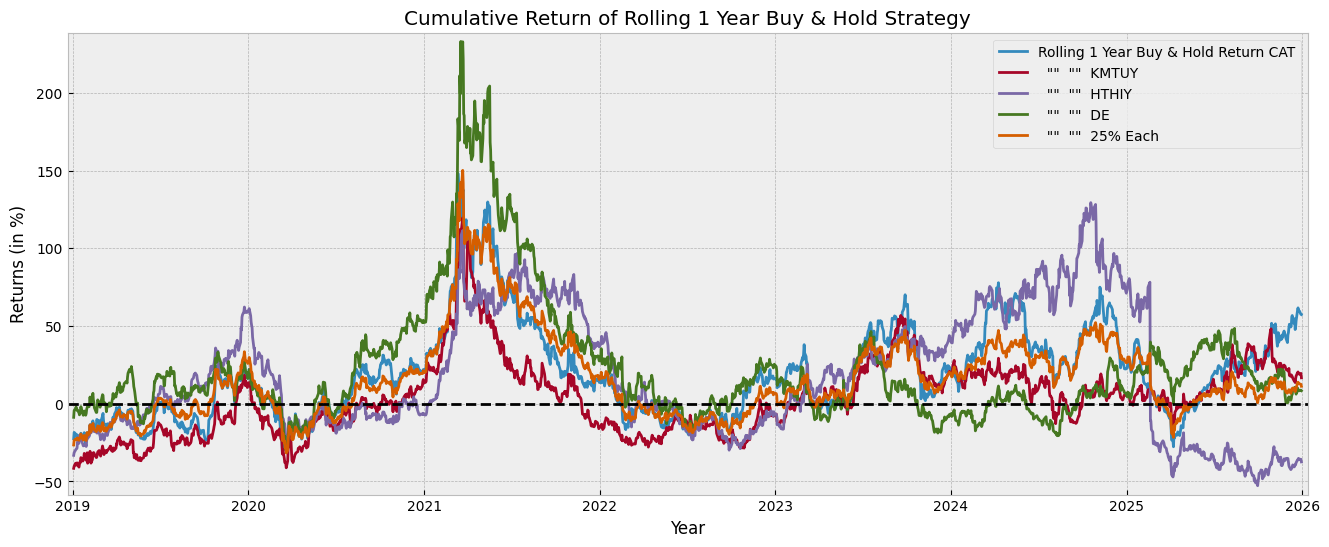

In [57]:
CAT1Y     = ICP['CAT']    /ICP['CAT'].shift(252)   -1
KMTUY1Y    = ICP['KMTUY']      /ICP['KMTUY'].shift(252)     -1
HTHIY1Y  = ICP['HTHIY'] /ICP['HTHIY'].shift(252)-1
DE1Y    = ICP['DE']      /ICP['DE'].shift(252)     -1

Each251Y = CAT1Y*(1/4) + KMTUY1Y*(1/4) +HTHIY1Y*(1/4) + DE1Y*(1/4)

plt.figure(figsize=(16,6))
plt.plot(CAT1Y*100,     label='Rolling 1 Year Buy & Hold Return CAT')
plt.plot(KMTUY1Y*100,    label='  ""  ""  KMTUY')
plt.plot(HTHIY1Y*100,  label='  ""  ""  HTHIY')
plt.plot(DE1Y*100,    label='  ""  ""  DE')
plt.plot(Each251Y*100, label='  ""  ""  25% Each')
plt.xlabel('Year')
plt.ylabel('Returns (in %)')
plt.title('Cumulative Return of Rolling 1 Year Buy & Hold Strategy')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

In [58]:
marr      = 0 #minimal acceptable rate of return (usually equal to the risk free rate)
CAT1YS     = (CAT1Y.mean()    -marr) /CAT1Y.std()
KMTUY1YS    = (KMTUY1Y.mean()   -marr) /KMTUY1Y.std()
HTHIY1YS  = (HTHIY1Y.mean() -marr) /HTHIY1Y.std()
DE1YS    = (DE1Y.mean()   -marr) /DE1Y.std()
Each251YS = (Each251Y.mean()-marr) /Each251Y.std()

print('CAT 1 Year Buy & Hold Sharpe Ratio =',round(CAT1YS,2))
print('KMTUY      "" "" =',round(KMTUY1YS   ,2))
print('HTHIY "" "" =',round(HTHIY1YS ,2))
print('DE      "" "" =',round(DE1YS   ,2))
print('25% Each "" "" =',round(Each251YS,2))

CAT 1 Year Buy & Hold Sharpe Ratio = 0.65
KMTUY      "" "" = 0.13
HTHIY "" "" = 0.46
DE      "" "" = 0.58
25% Each "" "" = 0.59


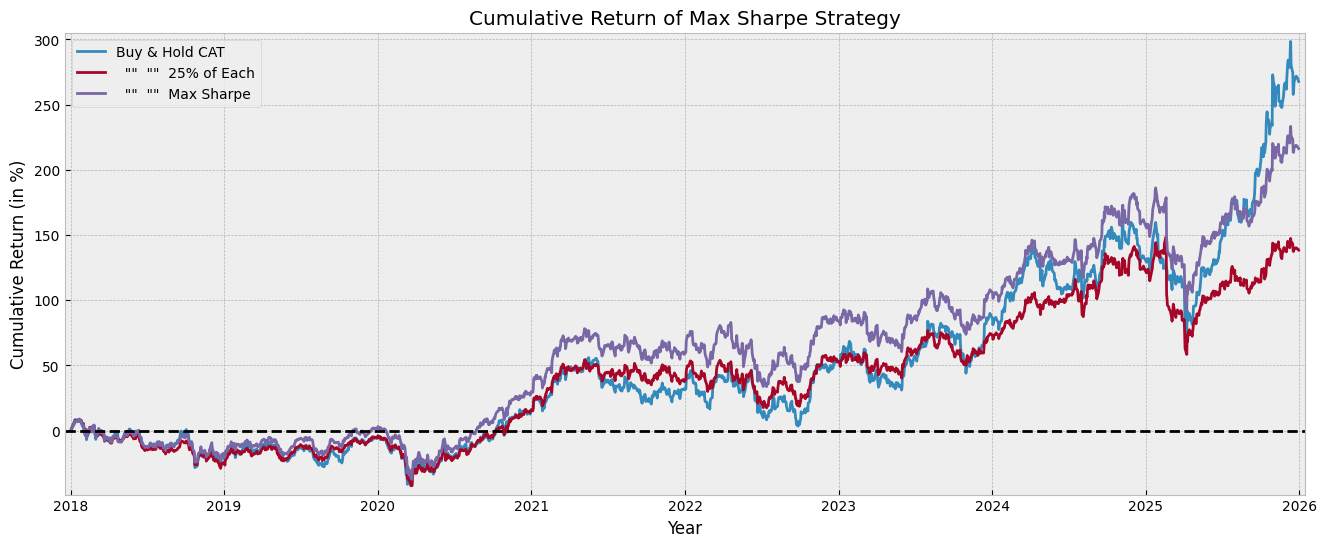

CAT Weight = 51.59 %
KMTUY ""       = 0.0 %
HTHIY ""  = 18.02 %
DE ""       = 30.38 %

Sharpe = 0.687

Median yearly excess return over CAT = -0.9 %


In [59]:
def multi(x):
    a, b, c, d = x
    return a, b, c, d   #the "optimal" weights we wish to discover

def maximize_sharpe(x): #objective function
    weights = (CAT1Y*multi(x)[0] + KMTUY1Y*multi(x)[1]
               + HTHIY1Y*multi(x)[2] + DE1Y*multi(x)[3])
    return -(weights.mean()/weights.std())

def constraint(x):      #since we're not using leverage nor short positions
    return 1 - (multi(x)[0]+multi(x)[1]+multi(x)[2]+multi(x)[3])

cons = ({'type':'ineq','fun':constraint})
bnds = ((0,1),(0,1),(0,1),(0,1))
initial_guess = (1, 0, 0, 0)

# this algorithm (SLSQP) easly gets stuck on a local
# optimal solution, genetic algorithms usually yield better results
# so my inital guess is close to the global optimal solution

ms = minimize(maximize_sharpe, initial_guess, method='SLSQP',
              bounds=bnds, constraints=cons, options={'maxiter': 10000})

msBuyHoldAll = (BuyHold_CAT*ms.x[0] + BuyHold_KMTUY*ms.x[1]
                + BuyHold_HTHIY*ms.x[2] + BuyHold_DE*ms.x[3])

msBuyHold1yAll = (CAT1Y*ms.x[0] + KMTUY1Y*ms.x[1]
                   + HTHIY1Y*ms.x[2] + DE1Y*ms.x[3])

plt.figure(figsize=(16,6))
plt.plot(BuyHold_CAT*100,     label='Buy & Hold CAT')
plt.plot(BuyHold_25Each*100, label='  ""  ""  25% of Each')
plt.plot(msBuyHoldAll*100,   label='  ""  ""  Max Sharpe')
plt.xlabel('Year')
plt.ylabel('Cumulative Return (in %)')
plt.title('Cumulative Return of Max Sharpe Strategy')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

print('CAT Weight =',round(ms.x[0]*100,2),'%')
print('KMTUY ""       =',round(ms.x[1]*100,2),'%')
print('HTHIY ""  =',round(ms.x[2]*100,2),'%')
print('DE ""       =',round(ms.x[3]*100,2),'%')
print()
print('Sharpe =',round(msBuyHold1yAll.mean()/msBuyHold1yAll.std(),3))
print()
print('Median yearly excess return over CAT =',round((msBuyHold1yAll.median()-CAT1Y.median())*100,1),'%')

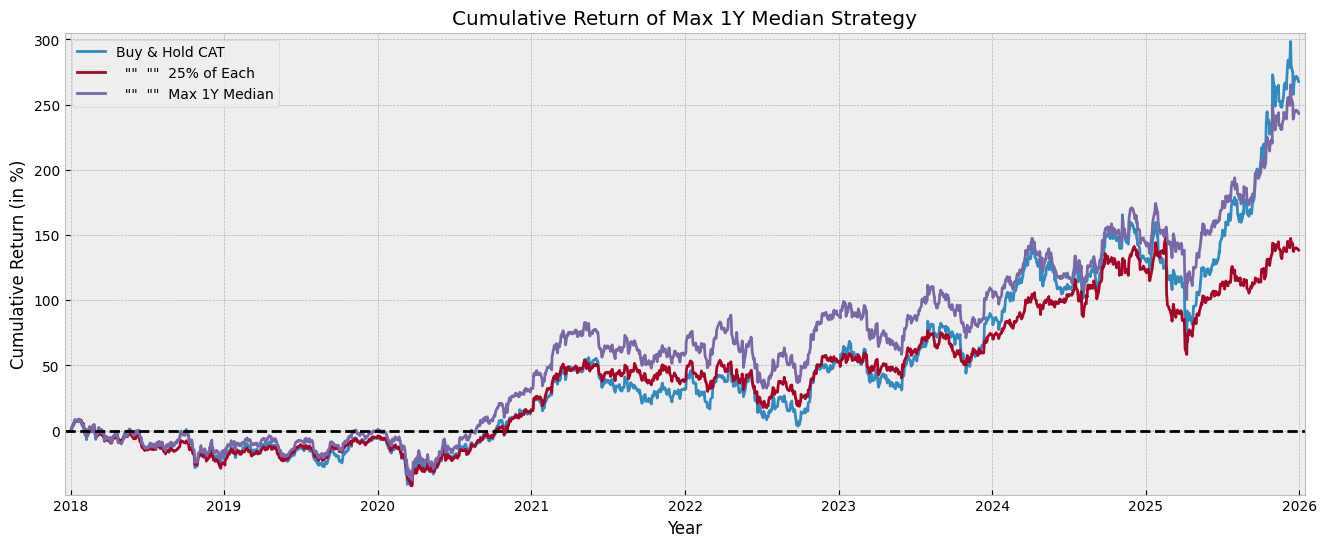

CAT Weight = 67.55 %
KMTUY ""       = 0.0 %
HTHIY ""  = 1.59 %
DE ""       = 30.86 %

Sharpe = 0.676

Median yearly excess return over CAT = 1.5 %


In [60]:
def maximize_median_yearly_return(x): #different objective function
    weights = (CAT1Y*multi(x)[0] + KMTUY1Y*multi(x)[1]
               + HTHIY1Y*multi(x)[2] + DE1Y*multi(x)[3])
    return -(float(weights.median()))

mm = minimize(maximize_median_yearly_return, initial_guess, method='SLSQP',
              bounds=bnds, constraints=cons, options={'maxiter': 10000})

mmBuyHoldAll = (BuyHold_CAT*mm.x[0] + BuyHold_KMTUY*mm.x[1]
                + BuyHold_HTHIY*mm.x[2] + BuyHold_DE*mm.x[3])

mmBuyHold1yAll = (CAT1Y*mm.x[0] + KMTUY1Y*mm.x[1]
                   + HTHIY1Y*mm.x[2] + DE1Y*mm.x[3])

plt.figure(figsize=(16,6))
plt.plot(BuyHold_CAT*100,     label='Buy & Hold CAT')
plt.plot(BuyHold_25Each*100, label='  ""  ""  25% of Each')
plt.plot(mmBuyHoldAll*100,   label='  ""  ""  Max 1Y Median')
plt.xlabel('Year')
plt.ylabel('Cumulative Return (in %)')
plt.title('Cumulative Return of Max 1Y Median Strategy')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

print('CAT Weight =',round(mm.x[0]*100,2),'%')
print('KMTUY ""       =',round(mm.x[1]*100,2),'%')
print('HTHIY ""  =',round(mm.x[2]*100,2),'%')
print('DE ""       =',round(mm.x[3]*100,2),'%')
print()
print('Sharpe =',round(mmBuyHold1yAll.mean()/mmBuyHold1yAll.std(),3))
print()
print('Median yearly excess return over CAT =',round((mmBuyHold1yAll.median()-CAT1Y.median())*100,1),'%')

/tmp/ipython-input-4220855273.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  YTD_CAT     = ICP['CAT'][-252:]    /float(ICP['CAT'][-252])   -1
/tmp/ipython-input-4220855273.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  YTD_KMTUY    = ICP['KMTUY'][-252:]      /float(ICP['KMTUY'][-252])     -1
/tmp/ipython-input-4220855273.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  YTD_HTHIY  = ICP['HTHIY'][-252:] /float(ICP['HTHIY'

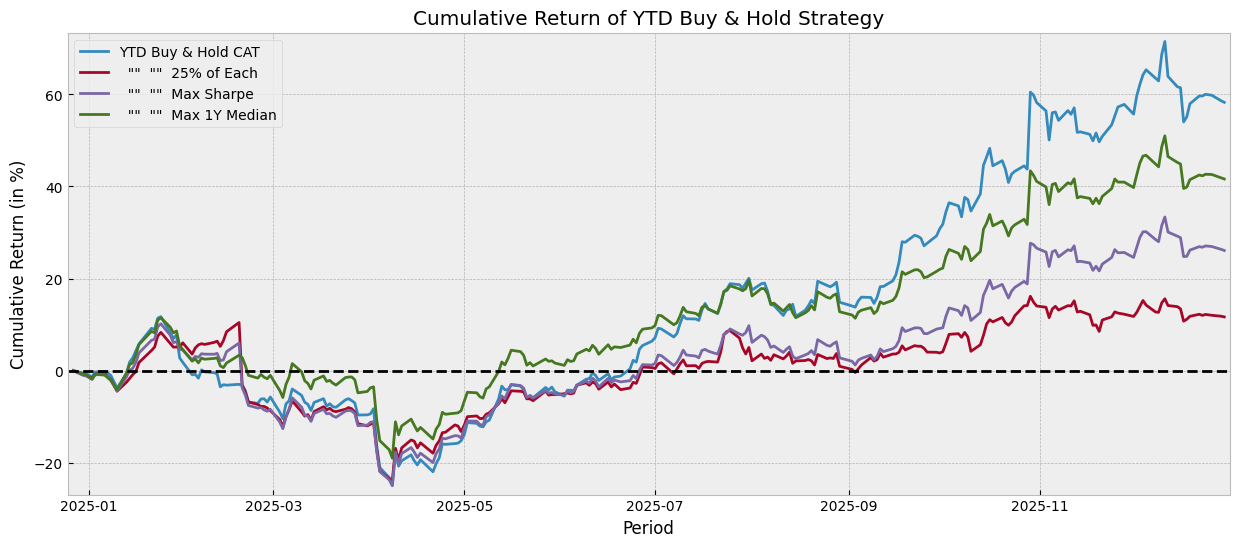

Buy & Hold CAT YTD Performance (at 1 July 2020) = 58.2 %
 "" "" 25% of Each   "" "" = 11.7 %
 "" "" Max Sharpe    "" "" = 26.1 %
 "" "" Max 1Y Median "" "" = 41.6 %


/tmp/ipython-input-4220855273.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Buy & Hold CAT YTD Performance (at 1 July 2020) =',round(float(YTD_CAT[-1:]*100),1),'%')
/tmp/ipython-input-4220855273.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(' "" "" 25% of Each   "" "" =',round(float(YTD_25Each[-1:]*100),1),'%')
/tmp/ipython-input-4220855273.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(' "" "" Max Sharpe    "" "" =',round(float(YTD_max_sharpe[-1:]*100),1),'%')
/tmp/ipython-input-4220855273.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(' "" "" Ma

In [61]:
YTD_CAT     = ICP['CAT'][-252:]    /float(ICP['CAT'][-252])   -1
YTD_KMTUY    = ICP['KMTUY'][-252:]      /float(ICP['KMTUY'][-252])     -1
YTD_HTHIY  = ICP['HTHIY'][-252:] /float(ICP['HTHIY'][-252])-1
YTD_DE    = ICP['DE'][-252:]      /float(ICP['DE'][-252])     -1

YTD_25Each = YTD_CAT*(1/4) + YTD_KMTUY*(1/4) + YTD_HTHIY*(1/4) + YTD_DE*(1/4)

YTD_max_sharpe = YTD_CAT*ms.x[0] + YTD_KMTUY*ms.x[1] + YTD_HTHIY*ms.x[2] + YTD_DE*ms.x[3]
YTD_max_median = YTD_CAT*mm.x[0] + YTD_KMTUY*mm.x[1] + YTD_HTHIY*mm.x[2] + YTD_DE*mm.x[3]

plt.figure(figsize=(15,6))
plt.plot(YTD_CAT*100,         label='YTD Buy & Hold CAT')
plt.plot(YTD_25Each*100,     label='  ""  ""  25% of Each')
plt.plot(YTD_max_sharpe*100, label='  ""  ""  Max Sharpe')
plt.plot(YTD_max_median*100, label='  ""  ""  Max 1Y Median')
plt.xlabel('Period')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.title('Cumulative Return of YTD Buy & Hold Strategy')
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

print('Buy & Hold CAT YTD Performance (at 1 July 2020) =',round(float(YTD_CAT[-1:]*100),1),'%')
print(' "" "" 25% of Each   "" "" =',round(float(YTD_25Each[-1:]*100),1),'%')
print(' "" "" Max Sharpe    "" "" =',round(float(YTD_max_sharpe[-1:]*100),1),'%')
print(' "" "" Max 1Y Median "" "" =',round(float(YTD_max_median[-1:]*100),1),'%')

/tmp/ipython-input-615491348.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ICP['CAtrat'][CAT1Y.shift(1)  > -0.17] = ICP['DERet']*0 + ICP['CATRet']*1
/tmp/ipython-input-615491348.py:7: FutureWarning: ChainedAssignmentError: behaviour wi

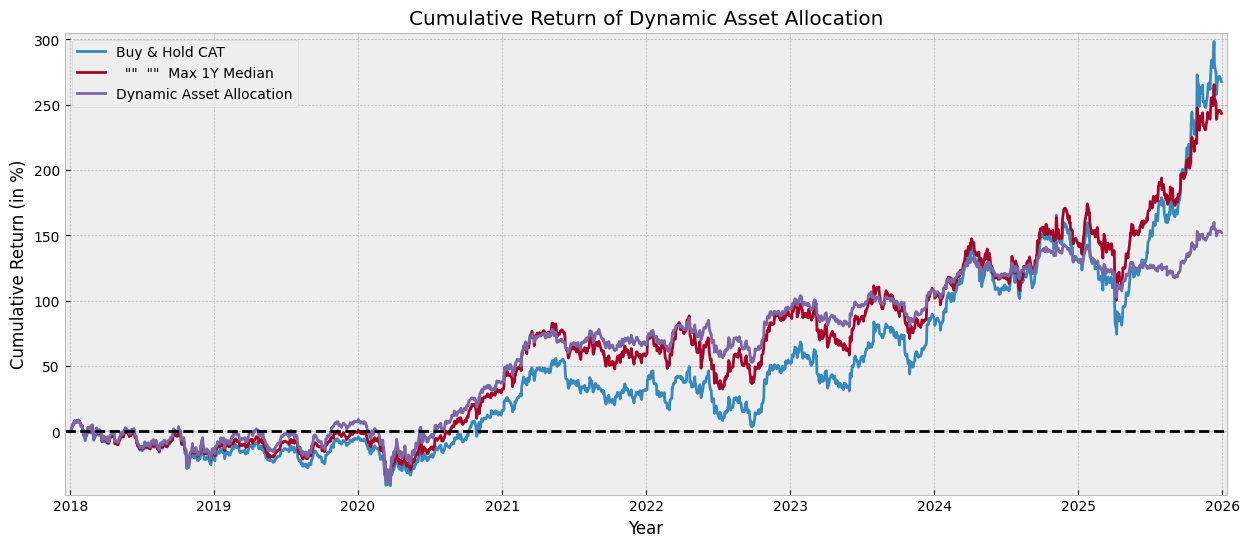

Median yearly excess return over CAT = -0.6 %
 "" "" Max 1Y Median "" ""  = 41.6 %
 Strategy YTD Performance   = 20.2 %


/tmp/ipython-input-615491348.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(' "" "" Max 1Y Median "" ""  =',round(float(YTD_max_median[-1:]*100),1),'%')
/tmp/ipython-input-615491348.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(' Strategy YTD Performance   =',round(float(DynAssAllytd[-1:]*100),1),'%')


In [62]:
ICP['CATRet']    = ICP['CAT'] /ICP['CAT'].shift(1)-1
ICP['DERet']   = ICP['DE']   /ICP['DE'].shift(1)  -1

ICP['CAtrat'] = ICP['CATRet'] * 0.8 + ICP['DERet'] * 0.2

ICP['CAtrat'][CAT1Y.shift(1)  > -0.17] = ICP['DERet']*0 + ICP['CATRet']*1
ICP['CAtrat'][DE1Y.shift(1) > 0.29]  = ICP['DERet']*1 + ICP['CATRet']*0

DynAssAll    = ICP['CAtrat'].cumsum()
DynAssAll1y  = ICP['CAtrat'].rolling(window=252).sum()
DynAssAllytd = ICP['CAtrat'][-252:].cumsum()

plt.figure(figsize=(15,6))
plt.plot(BuyHold_CAT*100,     label='Buy & Hold CAT')
plt.plot(mmBuyHoldAll*100,   label='  ""  ""  Max 1Y Median')
plt.plot(DynAssAll*100,      label='Dynamic Asset Allocation')
plt.xlabel('Year')
plt.ylabel('Cumulative Return (in %)')
plt.title('Cumulative Return of Dynamic Asset Allocation')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

print('Median yearly excess return over CAT =',round(float(DynAssAll1y.median()-CAT1Y.median())*100,1),'%')
print(' "" "" Max 1Y Median "" ""  =',round(float(YTD_max_median[-1:]*100),1),'%')
print(' Strategy YTD Performance   =',round(float(DynAssAllytd[-1:]*100),1),'%')